In [1]:
import h5py
with h5py.File("__run__/CE_Bavera_2020.h5", "r") as hf:
    theta_true = hf["test_theta"][()]
    m1, m2 = theta_true[:,0], theta_true[:, 1]
    m2_c = m2.copy()
    m1_c = m1.copy()
    m1[m1<m2] = m2[m1<m2]
    m2[m1_c<m2_c] = m1_c[m1_c<m2_c]
    chi=theta_true[:,-2]
    mc = ((m1*m2)**(3.0/5.0))/((m1+m2)**(1.0/5.0))
    q = m2/m1

    theta_true = hf["train_theta"][()]
    lambdas = hf['train_lambda'][()]
    m1t, m2t = theta_true[:,0], theta_true[:, 1]
    m2_c = m2t.copy()
    m1_c = m1t.copy()
    m1t[m1t<m2t] = m2t[m1t<m2t]
    m2t[m1_c<m2_c] = m1_c[m1_c<m2_c]
    chit=theta_true[:,-2]
    mct = ((m1t*m2t)**(3.0/5.0))/((m1t+m2t)**(1.0/5.0))
    qt = m2t/m1t

In [2]:
import matplotlib
from matplotlib.transforms import Bbox
import matplotlib.transforms as mtransforms
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] = 'Times New Roman'
matplotlib.rcParams['font.sans-serif'] = ['Bitstream Vera Sans']
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['axes.unicode_minus'] = False

import seaborn as sns
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('colorblind')
colors=sns.color_palette('colorblind')
fs=28
import numpy as np

/cvmfs/software.igwn.org/conda/envs/igwn-py39/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
data_true = np.loadtxt('dense_test_set.txt')

In [4]:
data_true.shape

(1000000, 4)

In [5]:
m1ut, m2ut = data_true[:,0], data_true[:, 1]
xmin,xmax= 2.3, 22.0
m2_c = m2ut.copy()
m1_c = m1ut.copy()
m1ut[m1ut<m2ut] = m2ut[m1ut<m2ut]
m2ut[m1_c<m2_c] = m1_c[m1_c<m2_c]
chiut=data_true[:,-2]
mcut = ((m1ut*m2ut)**(3/5))/((m1ut+m2ut)**(1/5))
qut = m2ut/m1ut

In [24]:
samps = np.loadtxt('/home/anarya.ray/jaxflows/paper/naz/examples/papers/1/amplified_samples_inclusive_16.txt')
m1,m2,chiamp = np.exp(samps[:,0]), np.exp(samps[:,1]), samps[:,2]
mcamp = ((m1*m2)**(3/5))/((m1+m2)**(1/5))
qamp = m2/m1
qamp[qamp>1] = 1/qamp[qamp>1]

print(samps.shape)

(1010000, 4)


In [25]:
qmax = 0.41
chimax = 0.7
mcmin = 7
mcmax = 100
argamp = (qamp<qmax)*(mcamp<mcmax)*(mcamp>mcmin)*(chiamp<chimax)#*(chiamp>ymin)*(chiamp<ymax)*
print(len(mcamp[argamp]))
argut = (qut<qmax)*(mcut>mcmin)*(mcut<mcmax)*(chiut<chimax)
print(len(mcut[argut]))
arg = (q<qmax)*(mc<mcmax)*(mc>mcmin)*(chi<chimax)#*(chi>ymin)*
print(len(mc[arg]))
argt = (qt<qmax)*(mct<mcmax)*(mct>mcmin)*(chit<chimax)
print(len(mct[argt]))
lambda_u = np.unique(lambdas, axis=0)
argins = [ ]
for i,lu in enumerate(lambda_u):
    argins.append(np.prod((lu == lambdas), axis=-1).astype(bool) * argt)
    print(len(chit[argins[i]]))
    

3534
2552
24
480
12
11
22
29
66
15
15
23
55
22
13
21
31
47
9
3
27
28
31


In [9]:
nbins = 11
mcbin = np.linspace(mcmin,15,nbins)
chibin = np.linspace(chiut.min(), 0.8, nbins)

In [10]:
ranges = (min(data_true[:,2]),chimax)

(-0.05908012400054195, 0.7547852566315505)


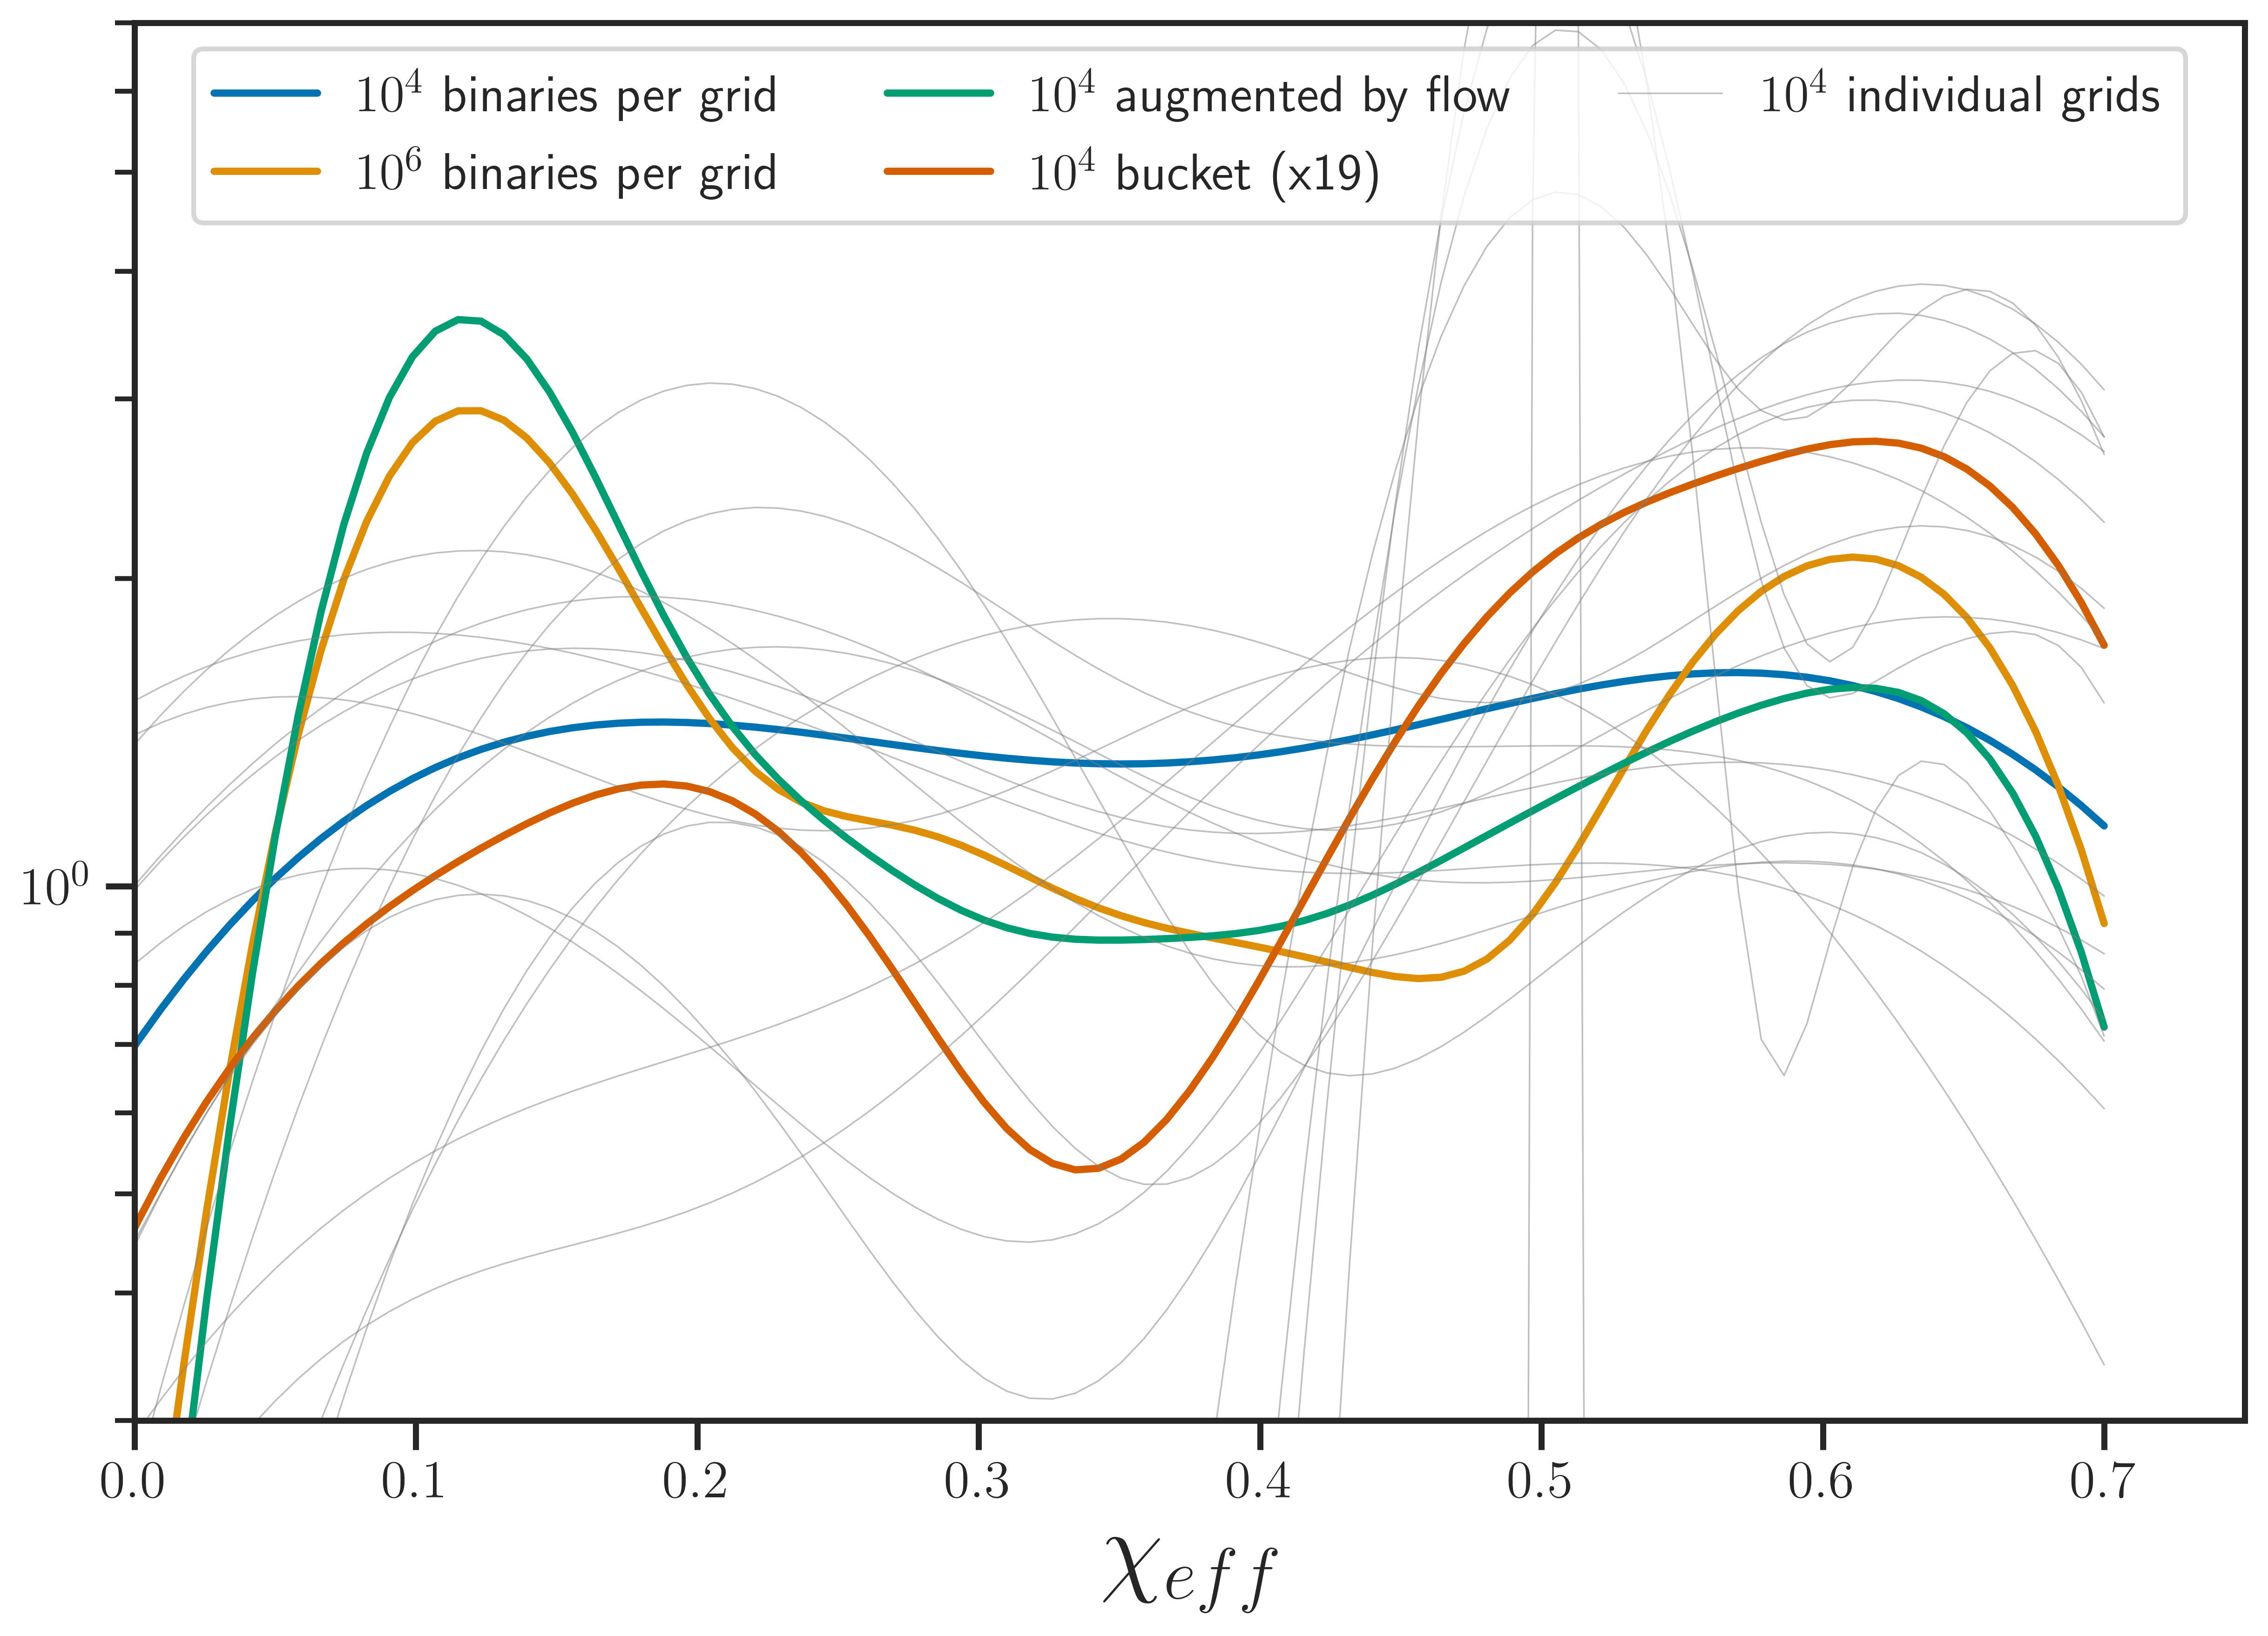

In [28]:
fig,ax = plt.subplots(1, figsize=(9*1.3,6*1.3), dpi =500)

from scipy.stats import gaussian_kde
x = 0.5*(chibin[1:]+chibin[:-1])
bounds = (x.min(), x.max())
print(bounds)
X = np.linspace(x.min(),x.max(),100)
ar = (X<bounds[0]) + (X>bounds[1])
X = np.linspace(ranges[0], ranges[1], 100)
kde = gaussian_kde(chi[arg])
y = kde.pdf(X)
#y+=kde.pdf(bounds[0]-X)
#y[ar] = 0.0
y/=np.trapz(y,X)
_=ax.plot(X, y, label = r"$10^4$ binaries per grid")
#_=ax.hist(chi[arg], density = True, bins = nbins, range = ranges,label = r"$10^4$ binaries per grid", histtype="step")


kde = gaussian_kde(chiut[argut])
y = kde.pdf(X)
#y+=kde.pdf(bounds[0]-X)
#y[ar] = 0.0
y/=np.trapz(y,X)
# _=ax.hist(chiut[argut], density = True, bins = nbins, range = ranges, label = r"$10^6$ binaries per grid", histtype="step")
_=ax.plot(X, y, label = r"$10^6$ binaries per grid")

kde = gaussian_kde(chiamp[argamp])
y = kde.pdf(X)
#y+=kde.pdf(bounds[0]-X)
y/=np.trapz(y,X)
_=ax.plot(X, y, label = r"$10^4$ augmented by flow")
#_=ax.hist(chiamp[argamp], density = True, bins = nbins, range = ranges, label = r"$10^4$ amplified by flow", histtype="step")
ax.legend(fontsize = 23, loc = "upper center")
ax.set_xlabel(r"$\chi_{eff}$", fontsize = 32)

kde = gaussian_kde(chit[argt])
y = kde.pdf(X)
#y+=kde.pdf(bounds[0]-X)
y/=np.trapz(y,X)
_=ax.plot(X, y, label = r"$10^4$ bucket (x19)")
#_=ax.hist(chit[argt], density = True, bins = nbins, range = ranges,  label = r"$10^4$ bucket (x19)", histtype="step")
for i, argin in enumerate(argins):
    kde = gaussian_kde(chit[argin])
    y = kde.pdf(X)
#    y+=kde.pdf(bounds[0]-X)
    y/=np.trapz(y,X)
    if i==0:
        _=ax.plot(X, y,  color = "grey", alpha =0.5, label = r"$10^4$ individual grids", linewidth=0.5)
                 #label = r"$10^4$ individual grids", linewidth=0.5, color = 'grey', histtype="step")
        #      _=ax.hist(chit[argin], density = True, bins = nbins, range = ranges, 
    else:
        _=ax.plot(X, y,  color = "grey", alpha =0.5, linewidth=0.5)
        #_=ax.hist(chit[argin], density = True, bins = nbins, range = ranges,   color = "grey", 
ax.legend(fontsize = 16, loc = "upper center", ncol = 3)
ax.set_xlabel(r"$\chi_{eff}$", fontsize = 32)
ax.set_ylim(0.3,7)
#plt.grid()
plt.xlim(0,0.75)
ax.set_yscale('log')
fig.savefig('amp.png', dpi=500,)
plt.show()